In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [35]:
# Investigate the impact of reduced dimensionality using PCA

## reading processed data of Fars
df = pd.read_csv('Fars_data.csv', index_col='time')
df.index = pd.to_datetime(df.index)

# convert hourly data to monthly data
df_00 = df[df.index.hour == 0]
df_daily = df_00.resample('D').mean()
df_monthly = df_daily.resample('M').mean()
df_monthly = df_monthly.reindex(columns=['tp', 'tcc', 'fdir', 'v10', 'u10','cl', 
                               'd2m', 't2m', 'mx2t', 'mn2t', 'e', 'sp'])

X, y = df_monthly.iloc[:, 1:], df_monthly.iloc[:, 0]

# Standardizing the features
X_norm = StandardScaler().fit_transform(X)
X_norm

AttributeError: 'Series' object has no attribute 'reshape'

In [13]:
pca = PCA()
principalComponents = pca.fit_transform(X_norm)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC'+str(i) for i in range(1, 12)])
principalDf

#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,3.000151,0.985305,-0.686425,-0.769107,0.266339,0.800389,-0.150759,-0.177667,0.037984,0.057670,0.000003
1,2.846354,-2.622291,-0.711882,0.240181,1.406608,-1.365897,-0.412878,0.281155,-0.403845,0.064773,0.006538
2,2.052452,-0.890977,-1.523845,0.200013,0.259394,0.549312,-0.164134,-0.280852,0.240719,0.055311,0.005316
3,0.473685,-0.046220,-2.013617,0.290659,-0.136914,-0.670069,0.229564,0.293038,-0.027481,0.075054,0.001263
4,-1.058629,-0.534656,-1.602043,0.170254,-0.627622,0.699242,-0.155360,-0.233022,0.541531,0.023463,0.000094
...,...,...,...,...,...,...,...,...,...,...,...
427,-3.342892,0.832733,1.018500,0.756151,1.601972,0.169206,-0.251480,-0.230927,-0.083428,0.026609,-0.002828
428,-1.892501,1.378392,1.636910,0.477972,-1.241220,-0.374682,0.054806,0.458182,0.052585,0.003204,-0.000005
429,-0.030219,-1.270123,2.421505,0.816001,-1.810712,-0.013954,-0.396246,-0.193128,0.343641,0.026738,-0.000226
430,1.518919,1.258087,2.656280,-0.059133,0.168672,-0.081138,0.373206,0.384761,0.141708,0.005715,-0.001169


[5.48078741e+01 1.46902362e+01 1.12579745e+01 9.05975061e+00
 4.51931895e+00 2.45545389e+00 1.53806746e+00 1.01623707e+00
 6.45146464e-01 9.91491012e-03 2.58780247e-05]


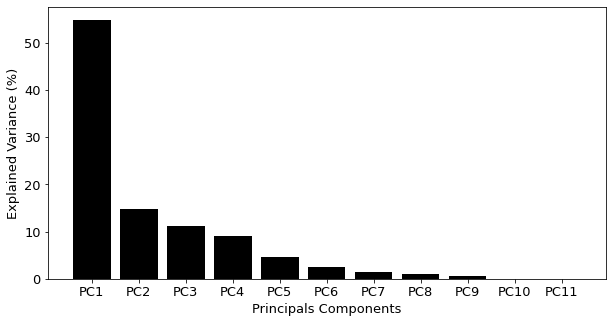

In [63]:
plt.rcParams.update({'font.size':13, 'figure.figsize': (10, 5)})

#The explained variance tells you how much information (variance) can be attributed to each of the principal components. 
ev = pca.explained_variance_ratio_ * 100
print(ev)

# # plt.plot(ev, type='bar')
plt.bar(['PC'+str(i) for i in range(1, 12)], ev, color='k')
plt.xlabel('Principals Components')
plt.ylabel('Explained Variance (%)')
plt.savefig('pca.png', dpi=300, bbox_inches='tight')
plt.show()

In [60]:
# extract features using PCA
from sklearn.model_selection import train_test_split

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

n_comps = .95
pca_2 = PCA(n_comps)
pca_2.fit(X_train)

X_train = pca_2.transform(X_train)
X_test = pca_2.transform(X_test)

print('{0}% of the variance amounts to {1} principal components'.format(n_comps, pca_2.n_components_))


0.95% of the variance amounts to 6 principal components


In [71]:
# predict with Adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# Fit regression model
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                           n_estimators=300, random_state=0)

# create model
#regr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300)
       
regr.fit(X_train, y_train)

# Predict
y_preds = regr.predict(X_test)

score_te = regr.score(X_test, y_test)
score_tr = regr.score(X_train, y_train)
print('Accuracy Score of test: ', score_te)
print('Accuracy Score of train: ', score_tr)

from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_preds))
print("RMSE= ",rmse)

Accuracy Score of test:  0.6839936388654301
Accuracy Score of train:  0.9515117495553641
RMSE=  0.023825471505273248
